In [1]:
## Libraries needs to run the script##
import sympy as sp
from scipy import interpolate
import math
import numpy as np
import pandas as pd
#import mdtraj as md
import matplotlib
import matplotlib as mpl
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage #for dendrogram specifically
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
sns.set(style='white')
from pylab import *
import pylab
from scipy.optimize import curve_fit

In [4]:
## read the input files using pandas ##
df = pd.read_csv('../../TLCL2/large_system_OPLS_AA/analysis.trr-PTENS-TOT.xvg', delim_whitespace=True, header=None, names= ["z", "pL"])
#df3 = pd.read_csv('OPLS-AA/tensor.dat', delim_whitespace=True, header=None, names= ["z", "pL"])
df1 = pd.read_csv('../../TLCL2/large_system_OPLS_AA/density_POT.xvg', delim_whitespace=True, header=None, names= ["z1", "dis"], skiprows=24)
df2 = pd.read_csv('../../TLCL2/large_system_OPLS_AA/density_CL.xvg', delim_whitespace=True, header=None, names= ["z2", "dis2"], skiprows=24)

In [5]:
# select first column and make list
z2=df2 ['z2'].tolist()
# select second column and make list
DIS2 = df2 ['dis2'].tolist()
# select first column and make list
z1=df1 ['z1'].tolist()
# select second column and make list
DIS = df1 ['dis'].tolist()
# select first column and make list
z = df ['z'].tolist()
# select second column and make list
pL = df ['pL'].tolist()
def Average(pL): 
    return sum(pL) / len(pL)
pN = Average(pL)
print("Average of the list =", round(pN, 2))
# define function v using lambda
# define function v using lambda
#v = lambda pL : pL
from scipy import integrate
#pN = (np.trapz(v(pL), z))
df['pN-pL'] = pN - df['pL']
df['multi'] = df['pN-pL'] * df['z']
# Write data array to file in table format
np.savetxt('table2.dat', df['pN-pL'],  fmt=['%.4f'], header='diff', comments='#')

Average of the list = -2.73


In [6]:
## divide the list of pressure profile from two section in the middle point where z=0##
C=df['pN-pL'].iloc[47:]
z1 = df['z'].iloc[47:]
Cr=df['pN-pL'].iloc[0:48]
Crr = Cr.iloc[::-1]
z2 = df['z'].iloc[0:48]

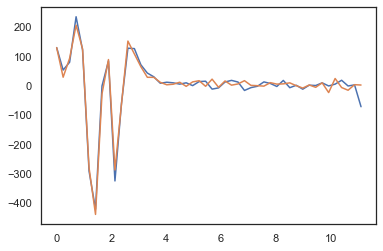

In [7]:
## make the exact overlap of the two section values & plot them together##
plt.plot(z1, C)
#plt.plot(z1, np.roll(Crr,-11))
plt.plot(z1, np.roll(Crr,0))

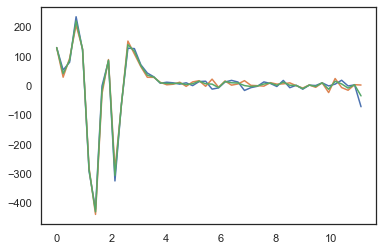

In [8]:
## add the two values and make an average out of it ##
value1 = C
value2 = np.roll(Crr,0)
avg1= (value1+value2)/2
## plot the average value in the previous plot ##
plt.plot(z1, C)
plt.plot(z1, np.roll(Crr,0))
plt.plot(z1, avg1)

In [9]:
left1 = avg1.iloc[::-1]
right1 = avg1.iloc[1:]
frames1 = [left1, right1]

In [10]:
result1 = pd.concat(frames1)
result1

94   -34.914339
93     2.956186
92    -8.420524
91     5.943086
90    14.753116
        ...    
90    14.753116
91     5.943086
92    -8.420524
93     2.956186
94   -34.914339
Name: pN-pL, Length: 95, dtype: float64

In [11]:
## eliminate the last value of the ion density profile ##
D1 = DIS[1:-1]
D2= DIS2[1:-1]

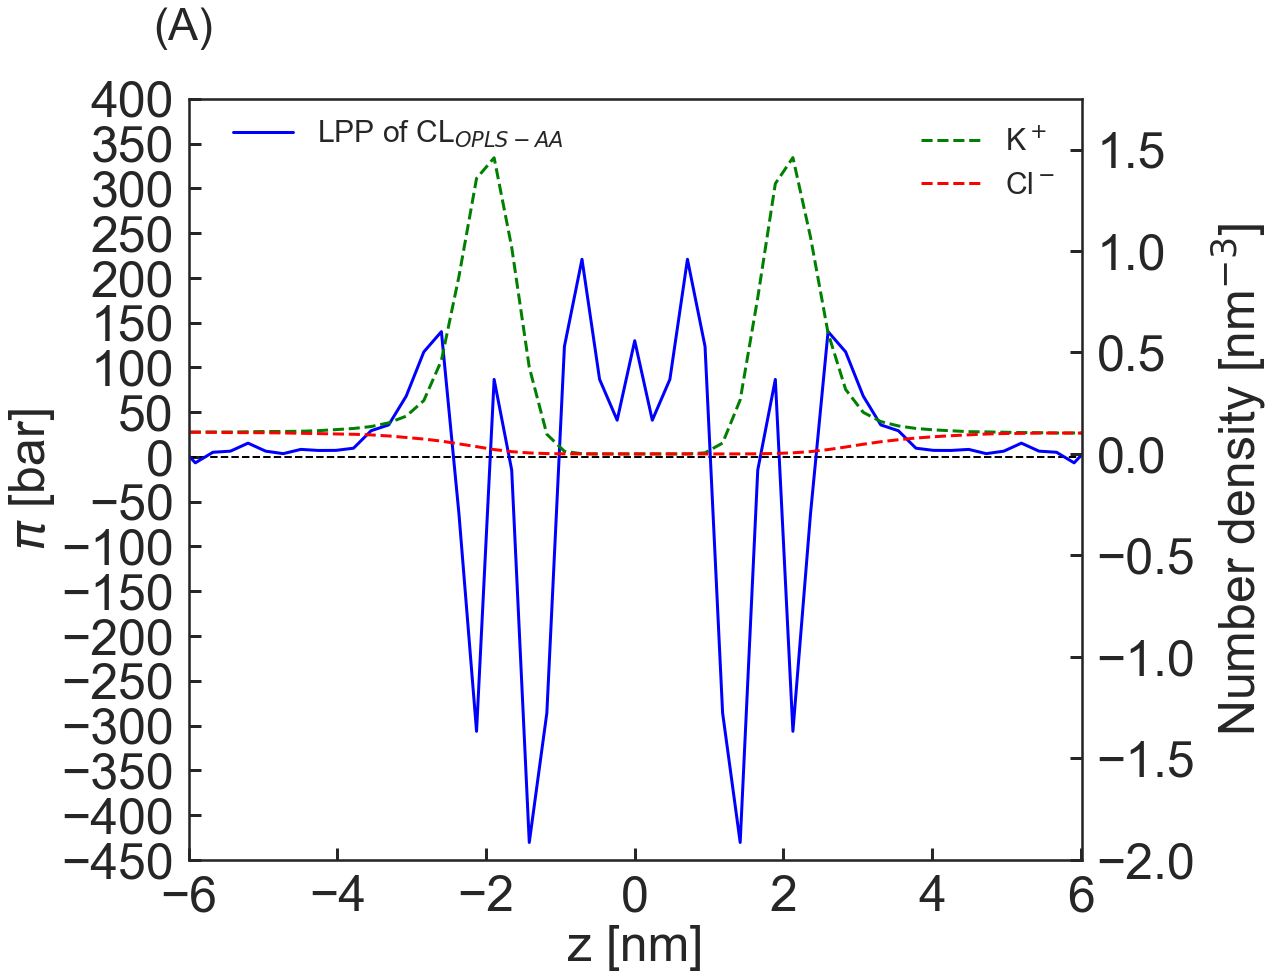

In [12]:
# Graph plot
fig = plt.figure(1034, figsize=(16,14))
ax1 = fig.add_subplot(111)
#import matplotlib.font_manager as font_manager

from pylab import*
rc('axes', linewidth=2.5)
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

#color = 'tab:red'
ax1.set_xlabel('z [nm]', fontsize=50, fontname='arial')
#ax1.set_xlabel('z [nm]', weight='bold',fontsize=30)
ax1.set_ylabel('$\pi$ [bar]', fontsize=50, fontname='arial')
ax1.plot(z, result1, color='blue', linewidth=3, label='LPP of CL$_{OPLS-AA}$')
#ax1.plot(zk, result1, color='blue', linewidth=3, label='LPP in K$^+$')

#ax1.tick_params(axis ='both', which= 'major', labelsize=25, width=3.0, length=15, direction='in')
# set X limit, Y1 and Y2 limit
ax1.set_ylim([-450, 400.01])
ax1.set_yticks(np.arange(-450, 400.01, 50))
#x1.yaxis.set_minor_locator(plt.MultipleLocator(200))
#x1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.tick_params(axis ='both', which= 'major', labelsize=50, width=3.0, length=12, direction='in', top=0, bottom=1, right=0, left=1, pad=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.plot(z, DIS, color="green", linestyle='--', linewidth=3, label='K$^+$')
ax2.plot(z, DIS2, color="red", linestyle='--', linewidth=3, label='Cl$^-$')
ax2.set_ylabel('Number density [nm$^{-3}$]', fontsize=50, fontname='arial', labelpad=14)  # we already handled the x-label with ax1
ax2.set_ylim([-2.0, 1.7501])
ax2.set_yticks(np.arange(-2.0, 1.7501,0.5))
#ax2.yaxis.set_minor_locator(plt.MultipleLocator(25))
#ax1.tick_params(axis='both', which= 'major', bottom = 'bool', labelsize=25 )
#ax1.tick_params(axis='both', which= 'minor', bottom = 'bool', labelsize=25 )
ax1.set_xlim([-6.0, 6.01])
#ax1.set_xticks(np.arange(-6.0, 6.01, 2))
ax2.xaxis.set_major_locator(plt.MultipleLocator(2))
ax1.hlines(0, xmin=-6.0, xmax=6.0, linestyle='--', color='black', linewidth=2)
#ax1.vlines(0, ymin=-550, ymax=150, linestyle='--', color='goldenrod', linewidth=2)
#############
#ax2.plot(E, D, color="red", label='DIS', linestyle='--', linewidth=3)
ax2.tick_params(axis ='both', which= 'major', labelsize=50, width=3.0, length=12, direction='in', top=0, bottom=1, right=1, left=0, pad=15)
ax1.legend(fontsize=30,bbox_to_anchor=(0.4501,1.009), edgecolor='white', loc='upper right')
ax2.legend(fontsize=30, bbox_to_anchor=(1.001,0.998),loc='upper right', edgecolor='white')
plt.title("(A)", loc = 'left', y=1.07, x=-0.04, fontsize=45, fontname='arial')
# Saving the plot as a 'png'
plt.savefig('Figure7A.jpg',bbox_inches='tight', dpi=600)
# Displaying the bar plot
plt.show()